In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn import utils

from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import praw
from praw.models import MoreComments
import nltk  
import random  
import string
import urllib.request  
import re  
import json
from pprint import pprint
import http.client
import emoji
import requests
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.text import Text 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import plotly.express as px
from PIL import Image

#word maps
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('verbnet3')
#To be used throughout

wordnet_lem = WordNetLemmatizer()
regexp = RegexpTokenizer('\w+')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reigh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\reigh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reigh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package verbnet3 to
[nltk_data]     C:\Users\reigh\AppData\Roaming\nltk_data...
[nltk_data]   Package verbnet3 is already up-to-date!


______________________________________________________________________________________________________
## INTRO TBD
 !!!!!!!!!!!!FROM PROPOSAL!!!!!!!!!!!

Background:
Jordan Peterson was a UofT psychology professor who over the better part of the
last decade has become a guide to an increasing number of young men around the world.
Initially causing controversy locally in 2016 at UofT with his refusal to adhere to the
administration's potential use of new gender pronouns, he became an outspoken media
hungry critic of ‘woke’ and ’cultural-marxist’ agendas sweeping the universities of Canada at
the time. He soon landed himself on Joe Rogan in the U.S. and quickly was harolled as a
conservative rational intellectual and quickly bolstered by the American male audience. This
led to his best seller “12 Rules for Life” which instructed young males how to live.
This has since led to an almost messianic presence among his young impressionable
fans, but also of right-wing media.



Personal Statement and Original Hypothesis:

In my original hypothesis I epected to see to an increase of right-wing rhetoric and propagandized political speech within the available writings of Jordan B. Peterson over time. I initially felt that the religious element of his populous was the smallest accounting factor, assuming mostly that his fanbase came more from extremist potentially libertarian men. This assumption I think, is based primarily on his video interviews, debates and statements I've seen of Dr.Peterson, but in large also due to the left-wing media porayl of his overall persona. While researching this project it's easy to see the online discourse attempting to pin Dr.Peterson's ideolgies and stances. Often to apposing degrees. One could essentially find all opinions occuring at once, a hero to some a villian to others. Both cases citing multiple sources. 

My attempt within this project is to try to 'pin down' potentially some recurrent theme or sense of ideolgy using NLP procedures and tools and too see if that has an effect on his fanbase. How is he percieved online? Are his books, lectures and videos having an overall linguistic or social effect on his fans and opposers? 



!!!!!!!!!!!!!!Create TOOL BREAKDOWN!!!!!!!!!!!!!!!!!!!!!

To start I've created the below helper functions that will be used throughout the project in order to clean and extract data.

In [2]:
#I'm very proud of my little workhorse here

def corpus_maker(element):
    in_text = ''
    for e in element:
        in_text += e.text
    corpus = nltk.sent_tokenize(in_text)
    return corpus   

In [3]:
#Cleaner for corpus objects

def web_cleaner(corpus):
    for i in range(len(corpus)):
        corpus[i] = corpus[i].lower()
        corpus[i] = re.sub(r'\W',' ', corpus [i])
        corpus[i] = re.sub(r'\s+',' ', corpus [i])
        corpus[i] = re.sub(r"^\s+", "", corpus [i])
        corpus[i] = re.sub('[^a-zA-Z]', ' ', corpus[i])
        corpus[i] = re.sub(' +', ' ', corpus[i])
        corpus[i] = re.sub('[^\w\s]',' ', corpus[i])
        corpus[i] = re.sub('[^-9A-Za-z ]',' ', corpus[i])
    return corpus

In [4]:
def sentiment_score(corpus): 
    feel_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = feel_obj.polarity_scores(corpus) 
    print("Overall sentiment of dictionary: ", sentiment_dict) 
    
    print("Sentiment seems: ", sentiment_dict['neg']*100, "% Negative") 
    print("Sentiment seems: ", sentiment_dict['neu']*100, "% Neutral") 
    print("Sentiment seems: ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentiment rating overall", end = " ")
    if sentiment_dict['pos'] >= 0.55 : 
        print("Positive") 
    
    elif sentiment_dict['neg'] <=  -0.55 :
        print("Negative") 
    else :
        print("Neutral")
        return

______________________________________________________________________________________________________
## Beginning with his 1999 book: 

## `Maps of Meaning: The Architecture of Belief`
______________________________________________________________________________________________________

In [5]:
#pulling from Internet Archive
raw_html = urllib.request.urlopen('https://ia800701.us.archive.org/7/items/MapsOfMeaningTheArchitectureOfBeliefPetersonlnwAdam/Maps%20of%20Meaning%20The%20Architecture%20of%20Belief-Peterson%20%28lnw%20Adam%29_djvu.txt')  
raw_html = raw_html.read()

article_html = BeautifulSoup(raw_html, 'lxml')

#turning the element into a corpus
df1 = corpus_maker(article_html)
#cleaning said corpus
df1 = web_cleaner(df1)
#turning into a dataframe
maps = pd.DataFrame(df1)

In [6]:
#Dropping head/tail printing info 

#head
maps = maps.drop(maps.index[0:20])
#tail
maps = maps.drop(maps.index[11370:12733])

In [7]:
#saving to .csv to keep/use for later without pulling

maps.to_csv("maps_of_meaning.csv", na_rep='NULL')

In [10]:
#Verifying the saved .csv

maps = pd.read_csv(r'C:/Users/reigh/Desktop/jor_project/maps_of_meaning.csv')
maps.head()

Unnamed: 0                                                  0
0          20  he will then reflect the problem for us in his...
1          21  this does not mean that my family was explicit...
2          22  i attended conservative protestant services du...
3          23  my father appeared essentially agnostic at lea...
4          24  he refused to even set foot in a church except...

In [11]:
#Cleaning extra column and tidying up tail text

maps = maps.drop(columns=['Unnamed: 0'], axis=0)
maps = maps.drop(maps.index[11349:11370])

In [12]:
#Starting tokenization with Maps of Meaning

maps['text_token']= maps['0'].apply(regexp.tokenize)
maps.head(3)

0  \
0  he will then reflect the problem for us in his...   
1  this does not mean that my family was explicit...   
2  i attended conservative protestant services du...   

                                          text_token  
0  [he, will, then, reflect, the, problem, for, u...  
1  [this, does, not, mean, that, my, family, was,...  
2  [i, attended, conservative, protestant, servic...

______________________________________________________________________________________________________
## Wordstop tuning:


As I began to work with the data I started in part to use frequency counter and wordclouds in order to tune my stopwords. As you'll see each dataframe will start with a selection of chosen words however each will contain words specific to each corpus in order to eventually achieve the best results.
______________________________________________________________________________________________________

In [13]:
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means', 'ways', 'have',
               'must', 'may', 'well', 'said', 'made', 'whose', 'yet', 'two', 'new', 'thing', 'things',
               'even', 'one', 'therefore', 'something', 'would', 'like', 'ibid', 'might', 'say',
               'without', 'time', 'process', 'could', 'should', 'however', 'also', 'upon', 'example', 'mean'
               'meaning', 'maps', 'maps meaning', 'know', 'gray', 'thy', 'part', 'see', 'every',
               'much', 'always', 'although', 'form', 'can', 'not', 'make', 'nothing', 'many', 'come',
               'given', 'known', 'within', 'still', 'take', 'another', 'appears', 'everything', 'first']

stopwords.extend(my_stopwords)


maps['text_token'] = maps['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

#removing two letter words
maps['text_string'] = maps['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
maps.head(3)

0  \
0  he will then reflect the problem for us in his...   
1  this does not mean that my family was explicit...   
2  i attended conservative protestant services du...   

                                          text_token  \
0  [reflect, problem, us, personal, life, thereby...   
1              [mean, family, explicitly, religious]   
2  [attended, conservative, protestant, services,...   

                                         text_string  
0  reflect problem personal life thereby show tru...  
1                   mean family explicitly religious  
2  attended conservative protestant services chil...

In [14]:
all_maps = ' '.join([word for word in maps['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_maps)

In [15]:
fdist = nltk.FreqDist(tokenized_words)
print(fdist.most_common(50))

[('world', 634), ('meaning', 553), ('unknown', 527), ('individual', 488), ('behavior', 429), ('life', 406), ('man', 405), ('nature', 370), ('experience', 359), ('human', 356), ('god', 348), ('social', 317), ('consequence', 313), ('great', 283), ('action', 272), ('state', 262), ('fact', 248), ('chaos', 248), ('hero', 243), ('knowledge', 241), ('existence', 233), ('order', 231), ('representation', 231), ('capacity', 229), ('mother', 223), ('good', 219), ('structure', 218), ('least', 214), ('evil', 212), ('act', 206), ('self', 205), ('death', 199), ('present', 194), ('figure', 192), ('place', 191), ('culture', 185), ('group', 183), ('spirit', 182), ('people', 181), ('matter', 180), ('moral', 176), ('constitutes', 173), ('course', 171), ('behavioral', 170), ('king', 169), ('become', 166), ('story', 165), ('consciousness', 165), ('necessary', 164), ('creative', 164)]


In [16]:
#splitting word axis'
y = [count for tag, count in fdist.most_common(25)]
x = [tag for tag, count in fdist.most_common(25)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 25 Most common words for 'Maps of Meaning: The Architecture of Belief'",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()

In [17]:
maps['text_string_fdist'] = maps['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [18]:
#using wordnet Lemmatizer from intro 

maps['text_string_lem'] = maps['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [19]:
all_maps_lem = ' '.join([word for word in maps['text_string_lem']])

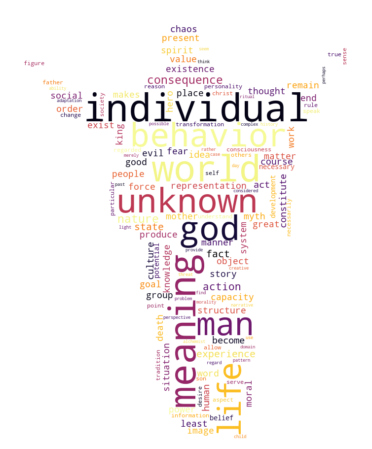

In [22]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/jesus2.png"))

wordcloud = WordCloud(width=8000, 
                     height=15000, 
                     random_state=0, 
                     max_font_size=200,
                     mask=mask,
                     background_color='white',
                     max_words=125,
                     colormap='inferno').generate(all_maps_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [23]:
sentiment_score(all_maps_lem)

Overall sentiment of dictionary:  {'neg': 0.159, 'neu': 0.656, 'pos': 0.185, 'compound': 1.0}
Sentiment seems:  15.9 % Negative
Sentiment seems:  65.60000000000001 % Neutral
Sentiment seems:  18.5 % Positive
Sentiment rating overall Neutral


______________________________________________________________________________________________________
## Initial impressions:

Already I am surprised to find the word "god" appear 348 times, "christ"  134 times, "gods" 145, "evil" 212 times, as well as "Jung" 156 times. The overall language is surpisingly biblical. At this point I've started to realize as well, that most of his language once stripped would constitute as 'neutral', though this will become a theme of his speech, having a base of his first book at 65% neutrality can be used as a metric to measure subsequent data sets.

The synopsis according to (https://www.goodreads.com/book/show/2218102.Maps_of_Meaning) and other websites for `Maps of Meaning`:
    
    "Why have people from different cultures and eras formulated myths and stories with similar structures? What does this similarity tell us about the mind, morality, and structure of the world itself? Jordan Peterson offers a provocative new hypothesis that explores the connection between what modern neuropsychology tells us about the brain and what rituals, myths, and religious stories have long narrated. A cutting-edge work that brings together neuropsychology, cognitive science, and Freudian and Jungian approaches to mythology and narrative, Maps of Meaning presents a rich theory that makes the wisdom and meaning of myth accessible to the critical modern mind."
    
    
I personally expected to see more medical jargon considering it's reputation and wikipedia's classification of the book's genre as "Psychology", or perhaps more academically leaning language. 
______________________________________________________________________________________________________

______________________________________________________________________________________________________
## Clustering for `Maps of Meaning`:
______________________________________________________________________________________________________

In [24]:
#setting the vectorizer
vectorizer = CountVectorizer(max_features=3500, lowercase=True)

#setting the X variable
X = vectorizer.fit_transform(maps['text_string_lem'])

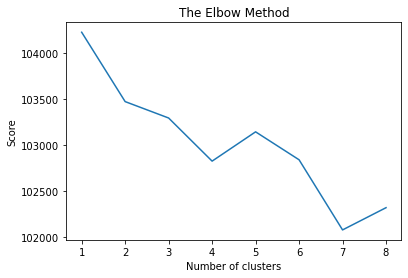

In [25]:
#Looking for the best number of clusters using elbow method
#takes quite some time to iterate

k_clusters = 8

score = []
for i in range(1, k_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1500, n_init=10, random_state=42)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1, k_clusters + 1 ), score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('maps_elbow.png')
plt.show()

In [26]:
#chosen k from elbow
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1500, n_init=10)
model.fit(X)

KMeans(max_iter=1500, n_clusters=5)

In [27]:
maps['clusters'] = model.labels_
maps.head(2)

0  \
0  he will then reflect the problem for us in his...   
1  this does not mean that my family was explicit...   

                                          text_token  \
0  [reflect, problem, us, personal, life, thereby...   
1              [mean, family, explicitly, religious]   

                                         text_string  \
0  reflect problem personal life thereby show tru...   
1                   mean family explicitly religious   

                                   text_string_fdist  \
0  reflect problem personal life thereby show tru...   
1                   mean family explicitly religious   

                                     text_string_lem  clusters  
0  reflect problem personal life thereby show tru...         0  
1                   mean family explicitly religious         0

In [28]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Clusters %d:" % i)
    for j in order_centroids[i, :10]: #number of centroid labels
        print (' %s' % terms[j])
    print('------------')

Clusters 0:
 meaning
 unknown
 behavior
 life
 nature
 human
 god
 consequence
 experience
 great
------------
Clusters 1:
 drives
 reality
 world
 material
 get
 ask
 suppose
 except
 nietzsche
 seems
------------
Clusters 2:
 man
 god
 life
 thou
 human
 earth
 world
 nature
 old
 meaning
------------
Clusters 3:
 individual
 social
 group
 unknown
 experience
 human
 society
 meaning
 life
 hero
------------
Clusters 4:
 world
 experience
 meaning
 unknown
 chaos
 nature
 tree
 elements
 action
 spirit
------------


______________________________________________________________________________________________________
* Settling on cluster labels and final amount proved quite difficult as the ideas in this book are somewhat loose, so there was a lot of n_feature playing and a large human element of interpreting the clusters. I needed to continually expand the centroid labels in order to get a better idea of the general sentiment/ideology behind each cluster. However this is not an exact science and is based on my own linguistic/social biases. 
   
   
    I must also acknowledge that as there is sort of a similar theme going on throughout the book, the clustering often contained specific words in each cluster and each attemptive iteration regardless of parameter or neighboring words within the given cluster. "Individual" was the most frequent with "Meaning" and "God" appearing along side in similar frequency and in all classifications. These are once again, are sentimentally a bit ambiguous.
______________________________________________________________________________________________________

In [29]:
#PCA compression n=2
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())

In [30]:
#split dimensions

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [31]:
maps['x0'] = x0
maps['x1'] = x1

In [32]:
cluster_map = {0: "Systemic Constraints", 1: "Social Behavior and Patterns", 2: "Individual Meaning, Feminine Chaos ", 3: "Experience of Man, God", 4: "Chaotic Nature, God"}
maps['clusters'] = maps['clusters'].map(cluster_map)

In [33]:
fig = px.scatter(maps, x='x0', y='x1',
                 color='clusters',
                 symbol='clusters', 
                 log_x=True)
            
fig.update_layout(
    title="Cluster for Maps of Meaning",
    xaxis_title="",
    yaxis_title="",
    legend_title="Top Clusters")

fig.update_layout(
    font_family="Bauhaus MD BT",
    font_color="crimson",
    title_font_family="Bauhaus MD BT",
    title_font_color="dodgerblue",
    legend_title_font_color="peru"
)
fig.update_xaxes(title_font_family="Bauhaus MD BT")


fig.show()

______________________________________________________________________________________________________
Though not featured in the final plot, I began seeing 'eliade' coming up alot while processing the data, as well as Jung(as seen 156 times). It is well known
that Jordan Peterson is a strident Jungian, a somewhat contentious fact within physchology as many of Jung's theories and associations have since been contested within modern practice. Though he was highly influential on the current field of psychology Jung it is not without controversy:
*https://www.researchgate.net/publication/327078408_Jungian_psychology_in_a_demanding_modern_world 

Peterson has a profitable website(https://www.understandmyself.com/personality-assessment) offering personality tests, essentially a condensed version of Jung's famous Typology Test. 
______________________________________________________________________________________________________

In [34]:
#He mentions Eliade 56 times
text = nltk.Text(maps['text_string_lem']) 
print(text.concordance("eliade", lines=5)) 

Displaying 5 of 56 matches:
 andrews yevin december  jung       eliade  jung   nietzsche  nietzsche referr
nion produced sumerian civilization eliade  eliade   nietzsche   nietzsche   d
duced sumerian civilization eliade  eliade   nietzsche   nietzsche   dostoevsk
ost least principle solzhenitsyn    eliade notes chapter   mcnaughton feldon r
r campbell eliade piaget   bruner   eliade  jung eliade  nietzsche   eliade  f
None


In [35]:
text = nltk.Text(maps['text_string_lem']) 
print(text.concordance('bellow')) 

Displaying 1 of 1 matches:
a magnusson century figure neumann  bellow   neumann   jung   jung  jung   rol
None


In [36]:
text3 = nltk.Text(maps['text_string_lem']) 
print(text3.concordance('campbell', lines=2)) 

Displaying 1 of 1 matches:
g help  origen hodson xii  eliade  campbell   neumann  tao ching waley    ill 
None


______________________________________________________________________________________________________
`Eliade`(https://en.wikipedia.org/wiki/Mircea_Eliade#1930s_political_transition) however I was personally unaware of though upon learning about him a bit, I'm happy to have pulled this particular reference. In my initial hypothesis I harkened to propaganda techniques I felt were appearing in his speech, repetative language and potential 'dog-whistling' to extremist groups. Though at this point there appears to be no linguistic evidence of this, the frequency of seeing Eliade's name being Eliade was also greatly involved with similar political trickiness in his time somewhat falls into my theory. Upon reading about him, there almost seems to be a mimicking of his life against Peterson's, especially in the sense of not falling into idealogies easily while associating with right-wing propagandizers and religious figures, and the explosiveness towards academia and free-speech. Though anti-Nazi, he was pro-Mussolini and an ardent supporter of the Iron Guard/Legion
(https://en.wikipedia.org/wiki/Iron_Guard).

In regards to the Iron Guard:

    "...the Legion was known for skillful propaganda, including a very capable use of spectacle. Utilizing marches, religious processions, patriotic and partisan hymns and anthems, along with volunteer work and charitable campaigns in rural areas, in support of anti-communism, the League presented itself as an alternative to corrupt parties. Initially, the Iron Guard hoped to encompass any political faction, regardless of its position on the political spectrum, that wished to combat the rise of communism in the USSR."
    
They are currently an active organization in Romania, and abroad. 


***Upon further research I am not the only one to have pulled out Eliade 

https://talesoftimesforgotten.com/2021/04/05/jordan-peterson-does-not-understand-mythology/

JP lists Eliade's works 6 times on his personal blog's recommended reading section: (https://www.jordanbpeterson.com/great-books/)


some further reading on right-wing associations for certain idealogies:
https://dissidentvoice.org/2022/06/aryan-right-wing-mythology-for-the-new-age-carl-jung-mircea-eliade-and-joseph-campbell/

research paper on right-wing Eliade associations:
https://www.sciencegate.app/document/10.3390/rel11050250 
full pdf of above: https://res.mdpi.com/d_attachment/religions/religions-11-00250/article_deploy/religions-11-00250-v2.pdf

artistic depiction:
https://www.fairobserver.com/region/europe/roland-clark-eugene-ionesco-rhinoceros-play-friends-fascist-fascism-european-culture-news-carr-79271/

example of current support(tertiary search):
https://traditionalbritain.org/blog/mircea-eliade-appreciation/


______________________________________________________________________________________________________

In [37]:
#As part of my original hypothesis I am searching for specific words over time, 
#I will test these over the course of the project-though I don't feel the nltk concordance method
#is completely reliable 100% of the time it's useful

text = nltk.Text(maps['text_string_lem']) 
print(text.concordance('soviet')) 
print(text.concordance('degenerate')) 
print(text.concordance('marx'))
print(text.concordance('marxist')) 
print(text.concordance('communist')) 

no matches
None
no matches
None
no matches
None
no matches
None
no matches
None


In [38]:
text.concordance(["neo", "marxist"])

no matches


In [39]:
al = nltk.Text(maps['text_string_lem']) 
print(al.concordance("allah")) 

no matches
None


In [40]:
bu = nltk.Text(maps['text_string_lem']) 
print(bu.concordance("buddha"))

no matches
None


In [41]:
brah = nltk.Text(maps['text_string_lem']) 
print(brah.concordance("brahma")) 

no matches
None


In [42]:
ya = nltk.Text(maps['text_string_lem']) 
print(ya.concordance("yahweh")) 

no matches
None


In [43]:
#Attempting sentiment analysis application to create classification

#first by creating a sentiment column to test
maps['sentiment'] = maps['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
maps.head()

0  \
0  he will then reflect the problem for us in his...   
1  this does not mean that my family was explicit...   
2  i attended conservative protestant services du...   
3  my father appeared essentially agnostic at lea...   
4  he refused to even set foot in a church except...   

                                          text_token  \
0  [reflect, problem, us, personal, life, thereby...   
1              [mean, family, explicitly, religious]   
2  [attended, conservative, protestant, services,...   
3  [father, appeared, essentially, agnostic, leas...   
4  [refused, set, foot, church, except, weddings,...   

                                         text_string  \
0  reflect problem personal life thereby show tru...   
1                   mean family explicitly religious   
2  attended conservative protestant services chil...   
3  father appeared essentially agnostic least tra...   
4   refused set foot church except weddings funerals   

                                   text_string_fdist  \
0  reflect problem personal life thereby show tru...   
1                   mean family explicitly religious   
2  attended conservative protestant services chil...   
3  father appeared essentially agnostic least tra...   
4   refused set foot church except weddings funerals   

                                     text_string_lem              clusters  \
0  reflect problem personal life thereby show tru...  Systemic Constraints   
1                   mean family explicitly religious  Systemic Constraints   
2  attended conservative protestant services chil...  Systemic Constraints   
3  father appeared essentially agnostic least tra...  Systemic Constraints   
4   refused set foot church except weddings funerals  Systemic Constraints   

         x0        x1  sentiment  
0 -0.043797 -0.027537    0.00000  
1 -0.166947  0.055224   -0.15625  
2 -0.082180  0.093992    0.00000  
3 -0.102177  0.047113   -0.10000  
4 -0.176116  0.083619    0.00000

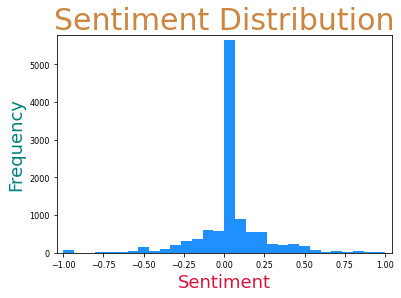

In [44]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(maps['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

_____________________________________________________________________________________________________
## Classificiation:
Though I have created a sentiment column in order to classify my model, the overall neutrality of Jordan's written speech will be continuously shown until his more current talking points. This makes analyzing his sentiment from a classification standpoint actually quite difficult. As the speech is majority neutral the classifier is unable to correctly sentimentally label, though this does help to prove the overall ambiguity of his speech having a .51 precision score. Due to this neutrality I'll reserve classification for subsequent data that may prove more emotionally charged enough for a computer to classify. 
_____________________________________________________________________________________________________

In [45]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(maps['text_string']).toarray()
y = maps['sentiment']

#transform to deal with continuous values of sentiment
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred, zero_division=0, average='micro')
print('Precision score for Random Forest Classifier: {0:0.2f}'.format(precision))

recall = recall_score(y_test, y_pred, zero_division=0, average='micro')
print('Recall score for Random Forest Classifier: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, y_pred, zero_division=0, average='micro')
print('f1 score for Random Forest Classifier: {0:0.2f}'.format(recall))

Precision score for Random Forest Classifier: 0.53
Recall score for Random Forest Classifier: 0.53
f1 score for Random Forest Classifier: 0.53


In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)

precision = precision_score(y_test, y_pred, zero_division=0, average='micro')
print('Precision score for LogisticRegression: {0:0.2f}'.format(precision))

recall = recall_score(y_test, y_pred, zero_division=0, average='micro')
print('Recall score for LogisticRegression: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, y_pred, zero_division=0, average='micro')
print('f1 score for LogisticRegression: {0:0.2f}'.format(recall))

Precision score for LogisticRegression: 0.44
Recall score for LogisticRegression: 0.44
f1 score for LogisticRegression: 0.44


______________________________________________________________________________________________________
I feel due to the neutrality of speech getting a good classification will be difficult as many words are ambiguous and I'm relying on pre-built lexicons. I'm sure there would be packages that would better perform however as we continue the scores will increase with increased sentiment.
______________________________________________________________________________________________________

_____________________________________________________________________________________________________
## The following examples will be linear and used to see if there is a personal change in speech:

    however, as some corpus' are smaller than others or contextually specific I will not engineer them each as deeply as we have many sets to choose from and are only setting the stage for further analysis.
_____________________________________________________________________________________________________

______________________________________________________________________________________________________
## UofT TedX talk 2011:
______________________________________________________________________________________________________

In [50]:
r = requests.get("https://singjupost.com/potential-jordan-peterson-at-tedxuoft-transcript/")

np_post = BeautifulSoup(r.content, 'html.parser')
link = np_post.find("<div>")
element = np_post.find_all('p')
# pprint(element4)


df1 = corpus_maker(element)
df1 = web_cleaner(df1)
ted_talk = pd.DataFrame(df1)
ted_talk.head()

0
0  full text of psychologist jordan peterson s ta...
1  and so we re always making some sets of presup...
2  and the assumptions that we use in our culture...
3                      it s objective it s external 
4  and there isn t any element of it that lends a...

In [51]:
ted_talk = ted_talk.drop([0])
ted_talk = ted_talk.drop(ted_talk.index[38:39])
ted_talk.head()

0
1  and so we re always making some sets of presup...
2  and the assumptions that we use in our culture...
3                      it s objective it s external 
4  and there isn t any element of it that lends a...
5  that s all been relegated to the subjective an...

In [52]:
#Converting to df, and running from that import

ted_talk.to_csv("ted_talk.csv", na_rep='NULL')

In [54]:
ted_talk = pd.read_csv(r'C:/Users/reigh/Desktop/jor_project/ted_talk.csv')
ted_talk = ted_talk.drop(columns=['Unnamed: 0'], axis=0)
ted_talk.head()

0
0  and so we re always making some sets of presup...
1  and the assumptions that we use in our culture...
2                      it s objective it s external 
3  and there isn t any element of it that lends a...
4  that s all been relegated to the subjective an...

In [55]:
#tokenizing

ted_talk['text_token']= ted_talk['0'].apply(regexp.tokenize)
ted_talk.head(3)

0  \
0  and so we re always making some sets of presup...   
1  and the assumptions that we use in our culture...   
2                      it s objective it s external    

                                          text_token  
0  [and, so, we, re, always, making, some, sets, ...  
1  [and, the, assumptions, that, we, use, in, our...  
2                [it, s, objective, it, s, external]

In [56]:
#Needs to be implemented everytime
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means', 'ways', 'have',
               'must', 'may', 'well', 'said', 'made', 'whose', 'yet', 'two', 'new', 'thing', 'things',
               'even', 'one', 'therefore', 'something', 'would', 'like', 'real', 'really', 'also', 'much'
               'get', 'forth', 'see', 'much', 'get']

stopwords.extend(my_stopwords)

ted_talk['text_token'] = ted_talk['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

#removing two letter words
ted_talk['text_string'] = ted_talk['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
ted_talk.head(3)

0  \
0  and so we re always making some sets of presup...   
1  and the assumptions that we use in our culture...   
2                      it s objective it s external    

                                          text_token  \
0  [always, making, sets, presuppositions, matter...   
1  [assumptions, use, culture, although, enabled,...   
2                              [objective, external]   

                                         text_string  
0  always making sets presuppositions matters ass...  
1  assumptions use culture although enabled devel...  
2                                 objective external

In [57]:
all_talk = ' '.join([word for word in ted_talk['text_string']])
tokenized_words2 = nltk.tokenize.word_tokenize(all_talk)

In [58]:
fdist2 = FreqDist(tokenized_words2)
print(fdist2.most_common(50))

[('think', 8), ('meaning', 7), ('reality', 6), ('pathologies', 5), ('people', 5), ('belief', 5), ('child', 5), ('love', 5), ('assumptions', 4), ('phenomena', 4), ('systems', 4), ('sense', 4), ('cliff', 4), ('biggest', 3), ('consequence', 3), ('annihilation', 3), ('word', 3), ('actually', 3), ('brain', 3), ('falling', 3), ('place', 3), ('later', 3), ('reasons', 3), ('around', 3), ('children', 3), ('eyes', 3), ('fire', 3), ('could', 3), ('presuppositions', 2), ('make', 2), ('life', 2), ('leave', 2), ('incomplete', 2), ('pay', 2), ('use', 2), ('although', 2), ('scientific', 2), ('lived', 2), ('objective', 2), ('set', 2), ('knowledge', 2), ('structure', 2), ('understand', 2), ('account', 2), ('role', 2), ('transformation', 2), ('looking', 2), ('advantages', 2), ('protect', 2), ('stem', 2)]


In [59]:
y = [count for tag, count in fdist2.most_common(20)]
x = [tag for tag, count in fdist2.most_common(20)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 20 words for 2011 TedXUofT",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()

In [60]:
ted_talk['text_string_fdist'] = ted_talk['text_token'].apply(lambda x: ' '.join([item for item in x if fdist2[item] >= 1 ]))

In [61]:
wordnet_lem = WordNetLemmatizer()

ted_talk['text_string_lem'] = ted_talk['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_talk_lem = ' '.join([word for word in ted_talk['text_string_lem']])

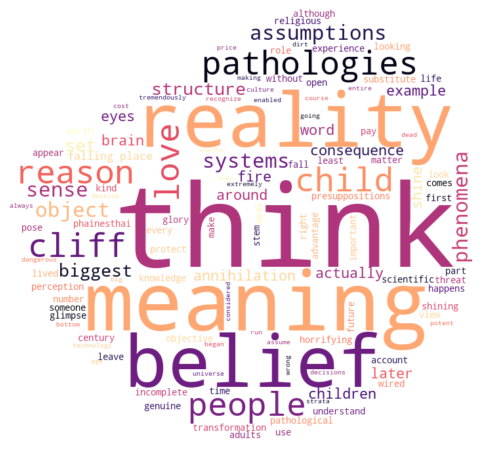

In [62]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/blob.png"))

wordcloud = WordCloud(width=10000, 
                     height=7000, 
                     random_state=10, 
                     max_font_size=175,
                     mask=mask,
                     background_color='white',
                     max_words=120,
                     colormap='magma').generate(all_talk_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [63]:
sentiment_score(all_talk_lem)

Overall sentiment of dictionary:  {'neg': 0.139, 'neu': 0.699, 'pos': 0.162, 'compound': 0.9257}
Sentiment seems:  13.900000000000002 % Negative
Sentiment seems:  69.89999999999999 % Neutral
Sentiment seems:  16.2 % Positive
Sentiment rating overall Neutral


In [64]:
#first by creating a sentiment column to test
ted_talk['sentiment'] = ted_talk['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
ted_talk.head()

0  \
0  and so we re always making some sets of presup...   
1  and the assumptions that we use in our culture...   
2                      it s objective it s external    
3  and there isn t any element of it that lends a...   
4  that s all been relegated to the subjective an...   

                                          text_token  \
0  [always, making, sets, presuppositions, matter...   
1  [assumptions, use, culture, although, enabled,...   
2                              [objective, external]   
3  [element, lends, reality, phenomena, meaning, ...   
4  [relegated, subjective, illusory, self, eviden...   

                                         text_string  \
0  always making sets presuppositions matters ass...   
1  assumptions use culture although enabled devel...   
2                                 objective external   
3    element lends reality phenomena meaning purpose   
4  relegated subjective illusory self evident set...   

                                   text_string_fdist  \
0  always making sets presuppositions matters ass...   
1  assumptions use culture although enabled devel...   
2                                 objective external   
3    element lends reality phenomena meaning purpose   
4  relegated subjective illusory self evident set...   

                                     text_string_lem  sentiment  
0  always making sets presuppositions matters ass...  -0.325000  
1  assumptions use culture although enabled devel...  -0.100000  
2                                 objective external   0.000000  
3    element lends reality phenomena meaning purpose   0.000000  
4  relegated subjective illusory self evident set...   0.305556

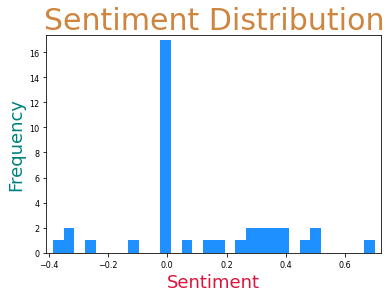

In [65]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(ted_talk['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

______________________________________________________________________________________________________
## Classification
______________________________________________________________________________________________________

In [66]:
vector = CountVectorizer(max_features=1500)

X1 = vector.fit_transform(ted_talk['text_string_lem']).toarray()
y1 = ted_talk['sentiment']

#transform to deal with continuous values of sentiment
lab = preprocessing.LabelEncoder()
y1 = lab.fit_transform(y1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [67]:
#previous RandomForestClassifier
rfc.fit(X_train1, y_train1)
y_pred2 = rfc.predict(X_test1) 

In [68]:
precision = precision_score(y_test1, y_pred2, zero_division=0, average='micro')
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test1, y_pred2, zero_division=0, average='micro')
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test1, y_pred2, zero_division=0, average='micro')
print('f1 score: {0:0.2f}'.format(recall))

Precision score: 0.50
Recall score: 0.50
f1 score: 0.50


In [69]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred3 = logreg.predict(X_test1) 

In [70]:
precision = precision_score(y_test1, y_pred3, zero_division=0, average='micro')
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test1, y_pred3, zero_division=0, average='micro')
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test1, y_pred3, zero_division=0, average='micro')
print('f1 score: {0:0.2f}'.format(recall))

Precision score: 0.50
Recall score: 0.50
f1 score: 0.50


<AxesSubplot:>

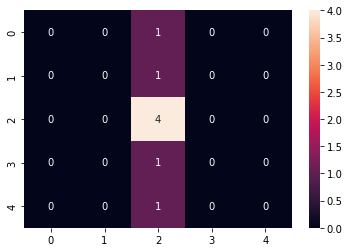

In [71]:
a = confusion_matrix(y_test1,y_pred3)
sns.heatmap(a, annot=True, label=True)

In [72]:
#final df save

ted_talk.to_csv("ted_talk.csv", na_rep='NULL')

______________________________________________________________________________________________________
______________________________________________________________________________________________________
## `12 Rules for Life: 12 Rules for Life: An Antidote to Chaos` 2018:



Barnes and Noble lists the synopsis for his second book as follow:

______________________________________________________________________________________________________

    "What does everyone in the modern world need to know?
    Renowned psychologist Jordan B. Peterson's answer to this most difficult of questions uniquely combines the hard-won truths of ancient tradition with the stunning revelations of cutting-edge scientific research.
    
    Humorous, surprising and informative, Dr. Peterson tells us why skateboarding boys and girls must be left alone, what terrible fate awaits those who criticize too easily, and why you should always pet a cat when you meet one on the street.
    
    What does the nervous system of the lowly lobster have to tell us about standing up straight (with our shoulders back) and about success in life? Why did ancient Egyptians worship the capacity to pay careful attention as the highest of gods? What dreadful paths do people tread when they become resentful, arrogant and vengeful?
    
    Dr. Peterson journeys broadly, discussing discipline, freedom, adventure and responsibility, distilling the world's wisdom into 12 practical and profound rules for life. 12 Rules for Life shatters the modern commonplaces of science, faith and human nature, while transforming and ennobling the mind and spirit of its readers."
    
______________________________________________________________________________________________________
    
    
    
    
    
If I were to read this as someone who knows nothing of Dr.Peterson, I would think that this would be a somewhat anthropological book covering many faiths and ethnographic approaches, using science as a focus, though with words like 'faith', 'tradition', and 'rules' it is fair to assume this book would have some religous topics, though I feel no domination can be inferred.      

______________________________________________________________________________________________________


In [73]:
#pulling from internet archive 

raw_html = urllib.request.urlopen('https://ia600907.us.archive.org/31/items/12RulesForLifeJordanB.PetersonAnAntidoteToChaos/12%20Rules%20For%20Life%20-%20Jordan%20B.%20Peterson%20-%20An%20antidote%20to%20chaos_djvu.txt')  
raw_html = raw_html.read()

article_html = BeautifulSoup(raw_html, 'lxml')

#Applying corpus function, cleaner and df transform
df1 = corpus_maker(article_html)
df1 = web_cleaner(df1)
twelve = pd.DataFrame(df1)

In [74]:
twelve = twelve.drop(maps.index[9877:9898])
twelve = twelve.drop(maps.index[0])

In [75]:
#For this particular df, if I saved to .csv and worked from that for some reason wouldn't be able
#to use the same processing methods at all, so in this case I've chosen to work all of the data then
#save to .csv once completed


regexp = RegexpTokenizer('\w+')

twelve['text_token']= twelve[0].apply(regexp.tokenize)
twelve.head(5)

0  \
1                                        more rules    
2                                            really    
3  isn t life complicated enough restricting enou...   
4  and given that our brains are plastic and all ...   
5  people don t clamour for rules even in the bib...   

                                          text_token  
1                                      [more, rules]  
2                                           [really]  
3  [isn, t, life, complicated, enough, restrictin...  
4  [and, given, that, our, brains, are, plastic, ...  
5  [people, don, t, clamour, for, rules, even, in...

In [76]:
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means', 'ways', 'have',
               'must', 'may', 'well', 'said', 'made', 'whose', 'yet', 'two', 'new', 'thing', 'things',
               'even', 'one', 'therefore', 'something', 'would', 'like', 'real', 'really', 'might',
               'much', 'also', 'has', 'was', 'many', 'still', 'maybe', 'see', 'say', 'make', 'think',
               'want', 'know', 'could', 'better', 'first', 'perhaps', 'someone', 'person', 'instead', 
               'part', 'everything', 'every', 'get', 'take', 'put', 'day', 'sometimes', 'however', 
               'others', 'years', 'back', 'long', 'another', 'enough', 'around', 'let', 'anything',
               'without', 'always', 'come', 'less', 'place', 'often', 'little', 'york', 'makes', 'knew',
               'set', 'use', 'ever', 'second', 'truly', 'small', 'among']

stopwords.extend(my_stopwords)

twelve['text_token'] = twelve['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [77]:
#removing two letter words
twelve['text_string'] = twelve['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
twelve.head(3)

0  \
1                                        more rules    
2                                            really    
3  isn t life complicated enough restricting enou...   

                                          text_token  \
1                                            [rules]   
2                                                 []   
3  [life, complicated, restricting, abstract, rul...   

                                         text_string  
1                                              rules  
2                                                     
3  life complicated restricting abstract rules un...

In [78]:
all_rules = ' '.join([word for word in twelve['text_string']])
tokenized_words4 = nltk.tokenize.word_tokenize(all_rules)

In [79]:
fdist4 = FreqDist(tokenized_words4)
print(fdist4.most_common(120))

[('people', 404), ('world', 312), ('good', 308), ('life', 268), ('time', 256), ('god', 220), ('children', 184), ('human', 168), ('self', 143), ('chaos', 137), ('man', 136), ('order', 134), ('manner', 128), ('become', 126), ('child', 125), ('work', 121), ('great', 120), ('social', 117), ('truth', 112), ('nothing', 109), ('right', 109), ('men', 108), ('suffering', 106), ('least', 105), ('evil', 102), ('nature', 99), ('story', 98), ('act', 98), ('terrible', 98), ('women', 98), ('problem', 89), ('future', 87), ('example', 85), ('everyone', 84), ('meaning', 84), ('understand', 83), ('existence', 83), ('attention', 82), ('necessary', 82), ('old', 81), ('sacrifice', 80), ('reason', 79), ('parents', 79), ('wrong', 78), ('past', 77), ('never', 76), ('tell', 76), ('worse', 76), ('thought', 75), ('true', 75), ('power', 75), ('else', 75), ('although', 75), ('rules', 74), ('individual', 74), ('book', 73), ('best', 73), ('live', 73), ('can', 73), ('not', 73), ('particularly', 72), ('idea', 72), ('pa

In [80]:
y = [count for tag, count in fdist4.most_common(27)]
x = [tag for tag, count in fdist4.most_common(27)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 27 words for 2018's '12 Rules for Life'",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()

In [81]:
twelve['text_string_fdist'] = twelve['text_token'].apply(lambda x: ' '.join([item for item in x if fdist4[item] >= 1 ]))

wordnet_lem = WordNetLemmatizer()

twelve['text_string_lem'] = twelve['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_rules_lem = ' '.join([word for word in twelve['text_string_lem']])

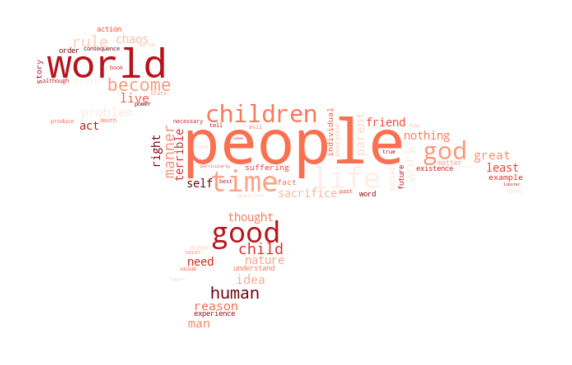

In [82]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/lobby.png"))

wordcloud = WordCloud(width=60000, 
                     height=60000, 
                     random_state=10, 
                     max_font_size=175,
                     mask=mask,
                     background_color='white',
                     max_words=75,
                     colormap='Reds').generate(all_rules_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [83]:
sentiment_score(all_rules_lem)

Overall sentiment of dictionary:  {'neg': 0.212, 'neu': 0.587, 'pos': 0.201, 'compound': -1.0}
Sentiment seems:  21.2 % Negative
Sentiment seems:  58.699999999999996 % Neutral
Sentiment seems:  20.1 % Positive
Sentiment rating overall Neutral


In [84]:
twelve['sentiment'] = twelve['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
twelve.head()

0  \
1                                        more rules    
2                                            really    
3  isn t life complicated enough restricting enou...   
4  and given that our brains are plastic and all ...   
5  people don t clamour for rules even in the bib...   

                                          text_token  \
1                                            [rules]   
2                                                 []   
3  [life, complicated, restricting, abstract, rul...   
4  [given, brains, plastic, develop, differently,...   
5  [people, clamour, rules, bible, moses, comes, ...   

                                         text_string  \
1                                              rules   
2                                                      
3  life complicated restricting abstract rules un...   
4  given brains plastic develop differently based...   
5  people clamour rules bible moses comes mountai...   

                                   text_string_fdist  \
1                                              rules   
2                                                      
3  life complicated restricting abstract rules un...   
4  given brains plastic develop differently based...   
5  people clamour rules bible moses comes mountai...   

                                     text_string_lem  sentiment  
1                                               rule   0.000000  
2                                                      0.000000  
3  life complicated restricting abstract rules un...  -0.041667  
4  given brains plastic develop differently based...   0.000000  
5  people clamour rules bible moses comes mountai...  -0.006250

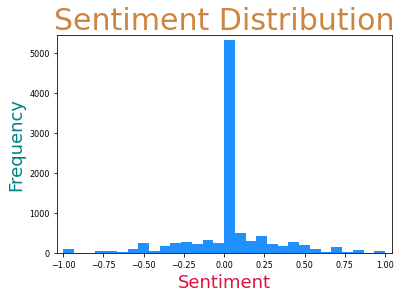

In [85]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(twelve['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

In [86]:
#Looking for particular words in corpus

text2 = nltk.Text(twelve['text_string_lem']) 
print(text2.concordance("eliade", lines=1)) 

no matches
None


In [87]:
text3 = nltk.Text(twelve['text_string_lem']) 
print(text3.concordance("degenerate")) 

no matches
None


In [88]:
text4 = nltk.Text(twelve['text_string_lem']) 
print(text4.concordance("soviet", lines=2))

no matches
None


In [89]:
text5 = nltk.Text(twelve['text_string_lem']) 
print(text5.concordance("life", lines=2)) 

Displaying 2 of 5 matches:
sist done rebuild state cycle begins life build structures live build families
od read psychologically reason alive life older best understood personality fa
None


In [90]:
text6 = nltk.Text(twelve['text_string_lem']) 
print(text6.concordance("jung")) 

Displaying 2 of 2 matches:
 milton reading room book text shtml jung  aion researches phenomenology self 
bess english tao rosenthal html kap  jung  aion researches phenomenology self 
None


In [91]:
text7 = nltk.Text(twelve['text_string_lem']) 
print(text7.concordance("communist")) 

no matches
None


In [92]:
brah = nltk.Text(twelve['text_string_lem']) 
print(brah.concordance("brahma")) 

no matches
None


In [93]:
bu = nltk.Text(twelve['text_string_lem']) 
print(bu.concordance("buddha")) 

no matches
None


In [94]:
al = nltk.Text(twelve['text_string_lem']) 
print(al.concordance("allah"))

no matches
None


In [95]:
ya = nltk.Text(twelve['text_string_lem']) 
print(ya.concordance("yahweh"))

no matches
None


______________________________________________________________________________________________________
## Moving onto classification and clustering
______________________________________________________________________________________________________

In [96]:
vector = CountVectorizer(max_features=1500)
X2 = vector.fit_transform(twelve['text_string_lem']).toarray()
y2 = twelve['sentiment']

#transform to deal with continuous values of sentiment
lab = preprocessing.LabelEncoder()
y2 = lab.fit_transform(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [97]:
rfc = RandomForestClassifier()
rfc.fit(X_train2, y_train2)
y_pred2 = rfc.predict(X_test2)

In [98]:
precision = precision_score(y_test2, y_pred2, zero_division=0, average='micro')
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test2, y_pred2, zero_division=0, average='micro')
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test2, y_pred2, zero_division=0, average='micro')
print('f1 score: {0:0.2f}'.format(recall))

# c_mat = confusion_matrix(y_test2, y_pred2)
# print('Confusion Matrix: ', '\n', c_mat)

Precision score: 0.62
Recall score: 0.62
f1 score: 0.62


In [99]:
print('For Maps of Meaning: ', '\n')
sentiment_score(all_maps_lem)
print('For 12 Rules: ', '\n')
sentiment_score(all_rules_lem)


For Maps of Meaning:  

Overall sentiment of dictionary:  {'neg': 0.159, 'neu': 0.656, 'pos': 0.185, 'compound': 1.0}
Sentiment seems:  15.9 % Negative
Sentiment seems:  65.60000000000001 % Neutral
Sentiment seems:  18.5 % Positive
Sentiment rating overall Neutral
For 12 Rules:  

Overall sentiment of dictionary:  {'neg': 0.212, 'neu': 0.587, 'pos': 0.201, 'compound': -1.0}
Sentiment seems:  21.2 % Negative
Sentiment seems:  58.699999999999996 % Neutral
Sentiment seems:  20.1 % Positive
Sentiment rating overall Neutral


In [100]:
print('size of Maps of Meaning: ', '\n', maps['text_string_lem'].describe())

size of Maps of Meaning:  
 count     11349
unique     9829
top            
freq       1121
Name: text_string_lem, dtype: object


In [101]:
print('size of 12 Rules: ', '\n', twelve['text_string_lem'].describe())

size of 12 Rules:  
 count     9877
unique    9092
top           
freq       456
Name: text_string_lem, dtype: object


______________________________________________________________________________________________________
## Comparative interpretation:
In his original book his neutrality score was running consistently at 65%, here we see a bit of a dip in neutrality and a 5% increase in negativity overall, however there is also a 2% jump in positivity. There is also a differing in the size of the two corpus' so maybe the larger dataset allowed for better sentimentality classification overall.
______________________________________________________________________________________________________

## Continuing to clustering `12 Rules for Life`
______________________________________________________________________________________________________

In [102]:
vectorizer = CountVectorizer(max_features=1500)

X1 = vectorizer.fit_transform(twelve['text_string_lem'])

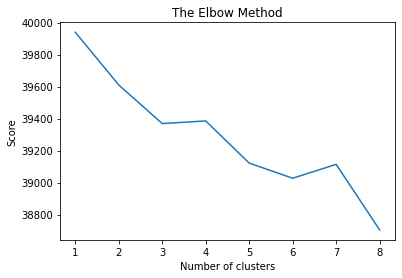

In [103]:
k_clusters = 8


score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(X1)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ), score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [104]:
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=1500, n_init=10)
model.fit(X1)

KMeans(max_iter=1500, n_clusters=3)

In [105]:
twelve['clusters'] = model.labels_
twelve.head()

0  \
1                                        more rules    
2                                            really    
3  isn t life complicated enough restricting enou...   
4  and given that our brains are plastic and all ...   
5  people don t clamour for rules even in the bib...   

                                          text_token  \
1                                            [rules]   
2                                                 []   
3  [life, complicated, restricting, abstract, rul...   
4  [given, brains, plastic, develop, differently,...   
5  [people, clamour, rules, bible, moses, comes, ...   

                                         text_string  \
1                                              rules   
2                                                      
3  life complicated restricting abstract rules un...   
4  given brains plastic develop differently based...   
5  people clamour rules bible moses comes mountai...   

                                   text_string_fdist  \
1                                              rules   
2                                                      
3  life complicated restricting abstract rules un...   
4  given brains plastic develop differently based...   
5  people clamour rules bible moses comes mountai...   

                                     text_string_lem  sentiment  clusters  
1                                               rule   0.000000         0  
2                                                      0.000000         0  
3  life complicated restricting abstract rules un...  -0.041667         0  
4  given brains plastic develop differently based...   0.000000         0  
5  people clamour rules bible moses comes mountai...  -0.006250         1

In [106]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Clusters %d:" % i)
    for j in order_centroids[i, :10]: #setting to 5 cluster names
        print (' %s' % terms[j])
    print('------------')

Clusters 0:
 world
 good
 life
 time
 god
 children
 human
 man
 self
 chaos
------------
Clusters 1:
 people
 good
 world
 children
 life
 time
 lives
 evil
 care
 although
------------
Clusters 2:
 wrong
 right
 good
 time
 future
 matter
 nothing
 question
 morality
 human
------------


In [107]:
#double checking

for i in range(k):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :7]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: world good life time god children human
Cluster 1: people good world children life time lives
Cluster 2: wrong right good time future matter nothing


In [108]:
pca = PCA(n_components=2, random_state=0)
pca_vecs = pca.fit_transform(X1.toarray())

In [109]:
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [110]:
twelve['x0'] = x0
twelve['x1'] = x1

In [111]:
cluster_map = {0: "people world life time god children", 1: "truth telling live world faith", 2: "good evil people human god right"}
twelve['clusters'] = twelve['clusters'].map(cluster_map)

In [112]:
fig = px.scatter(twelve, x='x0', y='x1', color='clusters', symbol='clusters', log_x=True)
            
fig.update_layout(
    title="Cluster for 12 Rules for Life",
    xaxis_title="",
    yaxis_title="",
    legend_title="Top Clusters")

fig.update_traces(marker_size=10)
fig.show()

In [113]:
#Saving final df
twelve.to_csv("12_rules.csv", na_rep='NULL')

______________________________________________________________________________________________________

Once again, god and belief occur quite a bit here in his `12 Rules for Life` book-"god" appearing 220 times, which for being touted as a doctor written psychological manual of sorts is interesting to see in these times. Though I appreciate that western religious terminology is often using Christianity as a reference point of comparison, the word "god" itself is inherinetly Christian:
https://en.wikipedia.org/wiki/God_(word)

If global religion was being spoken about one would think bare minimum Allah or Yaweh, Buddha or Brahma would be seen along side God, at least once. It was at this point I started looking for Christian related/associated posts about Jordan himself. I found a vast amount, more prodominently leaning towards Catholicism surprisingly as I've found his methods to be evangelical in media presence/style. Within the Catholic world his name has begun to float around with Bishop Robert Baron recently the auxilary Bishop of Los Angeles, California who currently heads 'Word on Fire' ministries.

An example of this is taken from the article (https://catholicherald.co.uk/ch/why-should-catholics-care-about-jordan-peterson/):

    "In a June 2019 speech to the US Conference of Catholic Bishops, Bishop Barron
    used Peterson as an example of someone who talks about the Bible in a way that is
    engaging and helpful for his audiences, who tend to be young and curious about
    religious matters, but not actually observant."


this was recently exemplified with a dual podcast(https://www.wordonfire.org/peterson/)

I would argue however, though Bishop Baron is clearly aligned with the Church and Peterson has been somewhat open about his Catholic leanings the methods of which they are pontificating, disseminating and behaving is more evangelical in nature. One could say there's more of a parallel between the methods of the Jesuits (https://en.wikipedia.org/wiki/Jesuits), an evangelical Catholic order where the current Pope Francis was founded. As a large portion of the American media audience considers itself 'christian evangelical' it would make sense to try to appease the more modern style of 'spreading the word'. (https://www.barna.com/research/survey-explores-who-qualifies-as-an-evangelical/)
______________________________________________________________________________________________________

______________________________________________________________________________________________________
## Continuing on:

    I was not able to easily pull his most recent book `Beyond Order: 12 More Rules for Life` in a legitimate manor, so it unfortunately will be left out of the final project though many postive reviews exist much like (https://www.theguardian.com/books/2021/mar/02/beyond-order-by-jordan-peterson-review-more-rules-for-life) and it's 4.2/5 rating with 15k user reviews. I offer it's antithesis (https://medium.com/arc-digital/the-jordan-rules-2d9c857cd576). What's interesting though in this Gaurdian review is no there mention of 'god', only 'soul' and a single mention of the Bible and seems more of a memiore style of writing. Though it seems it's being marketed with the same intentions as his second book. In the future I would be interested to process his third book in similar fashion.
    
The following examples of his writing post-12 Rules will be pulled from multiple sources but the goal is that everything will be in his own words before moving onto his fanbase and Reddit in part Two.
______________________________________________________________________________________________________

In [114]:
#Durham council response to being called a "racist" 2018

r = requests.get("https://www.jordanbpeterson.com/political-correctness/durham-city-council-purchases-unearned-virtue-with-the-currency-of-denouncement/")

np_post = BeautifulSoup(r.content, 'html.parser')
link = np_post.find("</div><p>")
element = np_post.find_all('p')
# pprint(element4)

df1 = corpus_maker(element)
df1 = web_cleaner(df1)
durham = pd.DataFrame(df1)
durham.head()

0
0  a few days ago july mayor pro tempore jillian ...
1  these are the signatories steve schewel mayor ...
2  to lay this bare i have composed this analysis...
3  the durham performing arts center did not invi...
4                              i rented the theater

In [115]:
durham.to_csv("durham.csv", na_rep='NULL')

In [117]:
durham = pd.read_csv(r'C:/Users/reigh/Desktop/jor_project/durham.csv')
durham.head()

Unnamed: 0                                                  0
0           0  a few days ago july mayor pro tempore jillian ...
1           1  these are the signatories steve schewel mayor ...
2           2  to lay this bare i have composed this analysis...
3           3  the durham performing arts center did not invi...
4           4                              i rented the theater

In [118]:
durham = durham.drop(columns=['Unnamed: 0'], axis=0)

In [119]:
durham.head()

0
0  a few days ago july mayor pro tempore jillian ...
1  these are the signatories steve schewel mayor ...
2  to lay this bare i have composed this analysis...
3  the durham performing arts center did not invi...
4                              i rented the theater

In [120]:
#Beginning the tokenization process

regexp = RegexpTokenizer('\w+')

durham['text_token']= durham['0'].apply(regexp.tokenize)
durham.head(5)

0  \
0  a few days ago july mayor pro tempore jillian ...   
1  these are the signatories steve schewel mayor ...   
2  to lay this bare i have composed this analysis...   
3  the durham performing arts center did not invi...   
4                              i rented the theater    

                                          text_token  
0  [a, few, days, ago, july, mayor, pro, tempore,...  
1  [these, are, the, signatories, steve, schewel,...  
2  [to, lay, this, bare, i, have, composed, this,...  
3  [the, durham, performing, arts, center, did, n...  
4                          [i, rented, the, theater]

In [121]:
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means', 'one', 'even', 'ways',
               'everyone', 'city', 'city council', 'council', 'without', 'email', 'peterson', 'jordan',
               'jordan peterson', 'many', 'pro']

stopwords.extend(my_stopwords)

durham['text_token'] = durham['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

#removing two letter words
durham['text_string'] = durham['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
durham.head(3)

0  \
0  a few days ago july mayor pro tempore jillian ...   
1  these are the signatories steve schewel mayor ...   
2  to lay this bare i have composed this analysis...   

                                          text_token  \
0  [days, ago, july, mayor, tempore, jillian, joh...   
1  [signatories, steve, schewel, mayor, protected...   
2  [lay, bare, composed, analysis, psychological,...   

                                         text_string  
0  days ago july mayor tempore jillian johnson co...  
1  signatories steve schewel mayor protected jill...  
2  lay bare composed analysis psychological motiv...

In [122]:
all_dur = ' '.join([word for word in durham['text_string']])
tokenized_words3 = nltk.tokenize.word_tokenize(all_dur)

In [123]:
fdist3 = FreqDist(tokenized_words3)
print(fdist3.most_common(40))

[('durham', 12), ('mayor', 10), ('statement', 10), ('protected', 8), ('community', 8), ('self', 7), ('right', 7), ('people', 6), ('left', 6), ('moral', 6), ('women', 6), ('believe', 6), ('member', 5), ('sentence', 5), ('dpac', 5), ('audience', 5), ('written', 5), ('opportunity', 5), ('trans', 5), ('writers', 5), ('fact', 4), ('political', 4), ('views', 4), ('responsibility', 4), ('reprehensible', 4), ('first', 4), ('manner', 4), ('next', 4), ('racist', 4), ('transphobic', 4), ('non', 4), ('families', 4), ('villain', 4), ('jillian', 3), ('life', 3), ('performing', 3), ('arts', 3), ('center', 3), ('ward', 3), ('anyone', 3)]


In [124]:
y = [count for tag, count in fdist3.most_common(20)]
x = [tag for tag, count in fdist3.most_common(20)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 20 words for Durham Council address",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()

In [125]:
durham['text_string_fdist'] = durham['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [126]:
wordnet_lem = WordNetLemmatizer()

durham['text_string_lem'] = durham['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_dur_lem = ' '.join([word for word in durham['text_string_lem']])

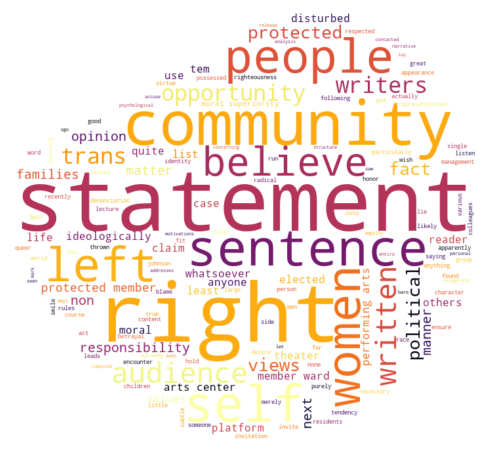

In [127]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/blob.png"))

wordcloud = WordCloud(width=5000, 
                     height=3000, 
                     random_state=10, 
                     max_font_size=200,
                     mask=mask,
                     background_color='white',
                     max_words=150,
                     colormap='inferno').generate(all_dur_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [128]:
sentiment_score(all_dur_lem)

Overall sentiment of dictionary:  {'neg': 0.135, 'neu': 0.61, 'pos': 0.254, 'compound': 0.9986}
Sentiment seems:  13.5 % Negative
Sentiment seems:  61.0 % Neutral
Sentiment seems:  25.4 % Positive
Sentiment rating overall Neutral


In [129]:
durham['sentiment'] = durham['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
durham.head(2)

0  \
0  a few days ago july mayor pro tempore jillian ...   
1  these are the signatories steve schewel mayor ...   

                                          text_token  \
0  [days, ago, july, mayor, tempore, jillian, joh...   
1  [signatories, steve, schewel, mayor, protected...   

                                         text_string  \
0  days ago july mayor tempore jillian johnson co...   
1  signatories steve schewel mayor protected jill...   

                                   text_string_fdist  \
0  days ago johnson colleagues saw fit release st...   
1  protected johnson protected member ward protec...   

                                     text_string_lem  sentiment  
0  days ago johnson colleagues saw fit release st...   0.150000  
1  protected johnson protected member ward protec...   0.107143

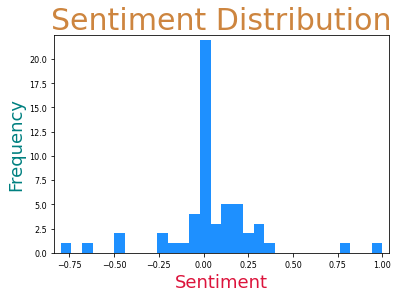

In [130]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(durham['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

In [131]:
#saving fully lemmatized df

durham.to_csv("durham.csv", na_rep='NULL')

______________________________________________________________________________________________________
Then with his open public opposition to the passing of bill C-16 (https://www.cbc.ca/cbcdocspov/features/canadas-gender-identity-rights-bill-c-16-explained), though with his 2016 public decree against adhearing to preferred pronouns within his academic institution, this is not a shock.
______________________________________________________________________________________________________

In [132]:
#identity blog post, Bill C-16 2019

r = requests.get("https://www.jordanbpeterson.com/blog-posts/on-the-psychological-and-social-significance-of-identity/")

np_post = BeautifulSoup(r.content, 'html.parser')
link = np_post.find("</div><p>")
element = np_post.find_all('p')
# pprint(element2)

df1 = corpus_maker(element)
df1 = web_cleaner(df1)
c16 = pd.DataFrame(df1)

In [133]:
c16.tail()

0
23  better the child suffers than the teacher thinks 
24  better the entire educational system reformula...
25  and now we re going to find out courtesy of th...
26  i would place a strong bet on the latter and i...
27  jordan peterson mailing list signup contact us...

In [134]:
regexp = RegexpTokenizer('\w+')

c16['text_token']= c16[0].apply(regexp.tokenize)
c16.head(5)

0  \
0  back in september of i released three videos e...   
1  c purported to merely add gender identity and ...   
2  however it was embedded in a web of policy muc...   
3  i was particularly upset with the insistence t...   
4  even sociologists neither the older classical ...   

                                          text_token  
0  [back, in, september, of, i, released, three, ...  
1  [c, purported, to, merely, add, gender, identi...  
2  [however, it, was, embedded, in, a, web, of, p...  
3  [i, was, particularly, upset, with, the, insis...  
4  [even, sociologists, neither, the, older, clas...

In [135]:
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means', 'ways', 'have',
               'must', 'may', 'well', 'said', 'made', 'whose', 'yet', 'two', 'new', 'thing', 'things']

stopwords.extend(my_stopwords)

c16['text_token'] = c16['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
c16['text_string'] = c16['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
c16.head(3)

0  \
0  back in september of i released three videos e...   
1  c purported to merely add gender identity and ...   
2  however it was embedded in a web of policy muc...   

                                          text_token  \
0  [back, september, released, three, videos, exp...   
1  [c, purported, merely, add, gender, identity, ...   
2  [however, embedded, web, policy, much, created...   

                                         text_string  
0  back september released three videos expressin...  
1  purported merely add gender identity gender ex...  
2  however embedded web policy much created ontar...

In [136]:
all_c = ' '.join([word for word in c16['text_string']])
tokenized_words4 = nltk.tokenize.word_tokenize(all_c)

In [137]:
fdist4 = FreqDist(tokenized_words4)
print(fdist4.most_common(25))

[('identity', 17), ('social', 8), ('child', 7), ('real', 7), ('school', 7), ('gender', 6), ('children', 6), ('role', 5), ('year', 5), ('parents', 5), ('six', 5), ('list', 4), ('human', 4), ('rights', 4), ('girl', 4), ('individual', 4), ('question', 4), ('might', 4), ('socially', 4), ('think', 4), ('everyone', 4), ('among', 4), ('teacher', 4), ('bill', 3), ('merely', 3)]


In [138]:
y = [count for tag, count in fdist4.most_common(20)]
x = [tag for tag, count in fdist4.most_common(20)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 20 words for c16 personal blog post",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()


In [139]:
wordnet_lem = WordNetLemmatizer()

c16['text_string_lem'] = c16['text_string'].apply(wordnet_lem.lemmatize)

all_c16_lem = ' '.join([word for word in c16['text_string_lem']])

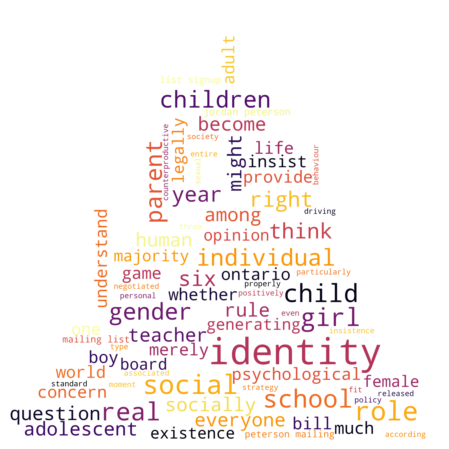

In [140]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/tri.png"))

wordcloud = WordCloud(width=5000, 
                     height=3000, 
                     random_state=10, 
                     max_font_size=200,
                     mask=mask,
                     background_color='white',
                     max_words=75,
                     colormap='inferno').generate(all_c16_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [141]:
sentiment_score(all_c16_lem)

Overall sentiment of dictionary:  {'neg': 0.138, 'neu': 0.746, 'pos': 0.115, 'compound': -0.9768}
Sentiment seems:  13.8 % Negative
Sentiment seems:  74.6 % Neutral
Sentiment seems:  11.5 % Positive
Sentiment rating overall Neutral


In [142]:
c16['sentiment'] = c16['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
c16.head(2)

0  \
0  back in september of i released three videos e...   
1  c purported to merely add gender identity and ...   

                                          text_token  \
0  [back, september, released, three, videos, exp...   
1  [c, purported, merely, add, gender, identity, ...   

                                         text_string  \
0  back september released three videos expressin...   
1  purported merely add gender identity gender ex...   

                                     text_string_lem  sentiment  
0  back september released three videos expressin...        0.0  
1  purported merely add gender identity gender ex...       -0.5

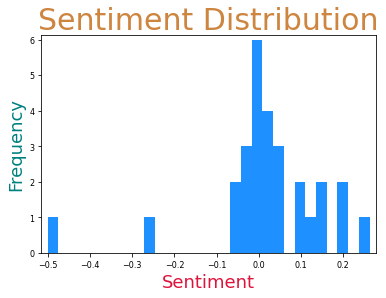

In [143]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(c16['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

In [144]:
c16.to_csv("c16.csv", na_rep='NULL')

______________________________________________________________________________________________________
## Diversity blog post 2019:
______________________________________________________________________________________________________

In [145]:
#diversity 2019

r = requests.get("https://www.jordanbpeterson.com/blog-posts/lie-of-diversity/")

np_post = BeautifulSoup(r.content, 'html.parser')
link = np_post.find("</div><p>")

element = np_post.find_all('p')

df1 = corpus_maker(element)
df1 = web_cleaner(df1)
diverse = pd.DataFrame(df1)
diverse.head()

0
0  if you are a canadian faculty member there is ...
1  the survey of postsecondary faculty and resear...
2  it has long been the case that research fundin...
3  that appears about to change the fact of this ...
4  what it truly means is let s aim for fewer whi...

In [146]:
diverse.tail(20)

0
55  we essentially assumed that each person was ch...
56  that works not perfectly but less imperfectly ...
57                       we toy with it at our peril 
58   u s department of education national center f...
59                                                   
60  digest of education statistics chapter table a...
61                              tauriac j j liem j h 
62                                                   
63  exploring the divergent academic outcomes of u...
64          journal of diversity in higher education 
65                            michael c campbell m c 
66                                      tishkoff s a 
67  african genetic diversity implications for hum...
68      annual review of genomics and human genetics 
69                             tishkoff s a reed f a 
70                                  frieldaender f r 
71                                             et al 
72                                                   
73                                           science 
74  jordan peterson mailing list signup contact us...

In [147]:
diverse = diverse.drop(diverse.index[58:74])

In [148]:
regexp = RegexpTokenizer('\w+')

diverse['text_token']= diverse[0].apply(regexp.tokenize)
diverse.head(5)

0  \
0  if you are a canadian faculty member there is ...   
1  the survey of postsecondary faculty and resear...   
2  it has long been the case that research fundin...   
3  that appears about to change the fact of this ...   
4  what it truly means is let s aim for fewer whi...   

                                          text_token  
0  [if, you, are, a, canadian, faculty, member, t...  
1  [the, survey, of, postsecondary, faculty, and,...  
2  [it, has, long, been, the, case, that, researc...  
3  [that, appears, about, to, change, the, fact, ...  
4  [what, it, truly, means, is, let, s, aim, for,...

In [149]:
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means',
                'one', 'even', 'ways', 'let', 'well', 'many', 'much', 'say', 'two', 'would',
               'must', 'set', 'made', 'second', 'may', 'like']

stopwords.extend(my_stopwords)

diverse['text_token'] = diverse['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [150]:
#removing two letter words
diverse['text_string'] = diverse['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
diverse.head(3)

0  \
0  if you are a canadian faculty member there is ...   
1  the survey of postsecondary faculty and resear...   
2  it has long been the case that research fundin...   

                                          text_token  \
0  [canadian, faculty, member, reasonable, chance...   
1  [survey, postsecondary, faculty, researchers, ...   
2  [long, case, research, funding, dependent, pos...   

                                         text_string  
0  canadian faculty member reasonable chance rece...  
1  survey postsecondary faculty researchers desig...  
2  long case research funding dependent possible ...

In [151]:
all_div = ' '.join([word for word in diverse['text_string']])
tokenized_words5 = nltk.tokenize.word_tokenize(all_div)

fdist5 = FreqDist(tokenized_words5)
print(fdist5.most_common(40))

[('diversity', 17), ('race', 9), ('categories', 9), ('research', 7), ('people', 7), ('groups', 6), ('sex', 6), ('impairment', 6), ('among', 5), ('manner', 5), ('example', 5), ('gender', 5), ('differences', 5), ('hiring', 5), ('problem', 5), ('number', 5), ('person', 5), ('blacks', 5), ('consequence', 4), ('meritocratic', 4), ('truly', 4), ('university', 4), ('necessary', 4), ('intersectionality', 4), ('group', 4), ('black', 4), ('determine', 4), ('place', 4), ('consider', 4), ('assume', 4), ('add', 4), ('category', 4), ('given', 4), ('list', 4), ('reasonable', 3), ('designed', 3), ('three', 3), ('granting', 3), ('funding', 3), ('case', 3)]


In [152]:
y = [count for tag, count in fdist5.most_common(25)]
x = [tag for tag, count in fdist5.most_common(25)]

fig = px.bar(maps, y=x, x=y, 
            text_auto='.2s', 
            color=x)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    title="Top 25 words for 2019 'Diversity' personal blog post",
    xaxis_title="Times Used",
    yaxis_title="Most Used Words",
    legend_title="Legend Title")

fig.show()


https://en.wikipedia.org/wiki/Meritocracy

In [153]:
diverse['text_string_fdist'] = diverse['text_token'].apply(lambda x: ' '.join([item for item in x if fdist5[item] >= 1 ]))

In [154]:
wordnet_lem = WordNetLemmatizer()

diverse['text_string_lem'] = diverse['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_div_lem = ' '.join([word for word in diverse['text_string_lem']])

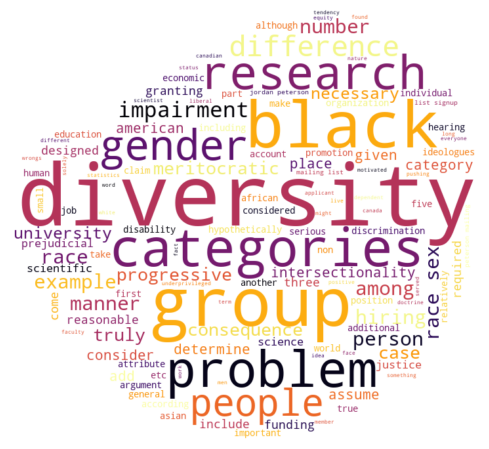

In [155]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/blob.png"))

wordcloud = WordCloud(width=5000, 
                     height=3000, 
                     random_state=10, 
                     max_font_size=200,
                     mask=mask,
                     background_color='white',
                     max_words=125,
                     colormap='inferno').generate(all_div_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [156]:
sentiment_score(all_div_lem)

Overall sentiment of dictionary:  {'neg': 0.119, 'neu': 0.731, 'pos': 0.15, 'compound': 0.9877}
Sentiment seems:  11.899999999999999 % Negative
Sentiment seems:  73.1 % Neutral
Sentiment seems:  15.0 % Positive
Sentiment rating overall Neutral


In [157]:
diverse['sentiment'] = diverse['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
diverse.head(2)

0  \
0  if you are a canadian faculty member there is ...   
1  the survey of postsecondary faculty and resear...   

                                          text_token  \
0  [canadian, faculty, member, reasonable, chance...   
1  [survey, postsecondary, faculty, researchers, ...   

                                         text_string  \
0  canadian faculty member reasonable chance rece...   
1  survey postsecondary faculty researchers desig...   

                                   text_string_fdist  \
0  canadian faculty member reasonable chance rece...   
1  survey postsecondary faculty researchers desig...   

                                     text_string_lem  sentiment  
0  canadian faculty member reasonable chance rece...        0.1  
1  survey postsecondary faculty researchers desig...        0.0

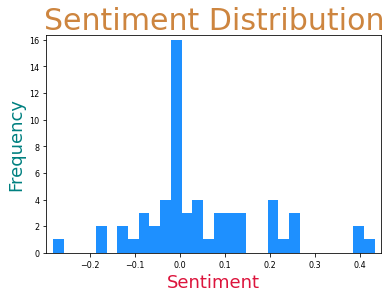

In [158]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(diverse['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

In [159]:
diverse.to_csv("diverse.csv", na_rep='NULL')

______________________________________________________________________________________________________
## Most recent National Post Article 2022:
______________________________________________________________________________________________________

In [160]:
#NATIONAL POST ARTICLE 2022

r = requests.get("https://www.msn.com/en-ca/news/other/jordan-peterson-worst-is-yet-to-come-from-trudeau-liberals/ar-AA102azq")

np_post = BeautifulSoup(r.content, 'html.parser')
link = np_post.find("</div><p>")

element = np_post.find_all('p')


df1 = corpus_maker(element)
df1 = web_cleaner(df1)
nat_po = pd.DataFrame(df1)
nat_po.head()

0
0  i have had the great privilege of travelling t...
1  first i have not travelled anywhere else where...
2  it may have escaped canadians notice but virtu...
3  there is absolutely no excuse for this except ...
4  what else might you expect however from a gove...

In [161]:
regexp = RegexpTokenizer('\w+')

nat_po['text_token']= nat_po[0].apply(regexp.tokenize)
nat_po.head(5)

0  \
0  i have had the great privilege of travelling t...   
1  first i have not travelled anywhere else where...   
2  it may have escaped canadians notice but virtu...   
3  there is absolutely no excuse for this except ...   
4  what else might you expect however from a gove...   

                                          text_token  
0  [i, have, had, the, great, privilege, of, trav...  
1  [first, i, have, not, travelled, anywhere, els...  
2  [it, may, have, escaped, canadians, notice, bu...  
3  [there, is, absolutely, no, excuse, for, this,...  
4  [what, else, might, you, expect, however, from...

In [162]:
my_stopwords = ['https', 'way', 'have', 'they', 'will', 'for', 'can', 'are', 'means',
                'one', 'even', 'ways', 'national', 'post', 'many', 'might', 'could', 'four',
               'else', 'would', 'almost', 'without', 'perhaps', 'trying', 'next']

stopwords.extend(my_stopwords)

nat_po['text_token'] = nat_po['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

#removing two letter words
nat_po['text_string'] = nat_po['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
nat_po.head(3)

0  \
0  i have had the great privilege of travelling t...   
1  first i have not travelled anywhere else where...   
2  it may have escaped canadians notice but virtu...   

                                          text_token  \
0  [great, privilege, travelling, american, citie...   
1  [first, travelled, anywhere, citizens, governm...   
2  [escaped, canadians, notice, virtually, nowher...   

                                         text_string  
0  great privilege travelling american cities sta...  
1  first travelled anywhere citizens government n...  
2  escaped canadians notice virtually nowhere dev...

In [163]:
all_nat = ' '.join([word for word in nat_po['text_string']])
tokenized_words6 = nltk.tokenize.word_tokenize(all_nat)

fdist6 = FreqDist(tokenized_words6)
print(fdist6.most_common(50))

[('trudeau', 10), ('canadians', 9), ('government', 8), ('canada', 7), ('great', 6), ('world', 6), ('energy', 6), ('liberals', 5), ('people', 5), ('instead', 5), ('working', 5), ('last', 4), ('self', 4), ('good', 4), ('policy', 4), ('poor', 4), ('willing', 4), ('truly', 4), ('going', 4), ('front', 4), ('years', 4), ('enough', 4), ('make', 4), ('party', 4), ('moral', 4), ('singh', 4), ('fools', 4), ('american', 3), ('states', 3), ('countries', 3), ('covid', 3), ('country', 3), ('prime', 3), ('minister', 3), ('economic', 3), ('gas', 3), ('believe', 3), ('impossible', 3), ('americans', 3), ('maga', 3), ('democrats', 3), ('despite', 3), ('worse', 3), ('particularly', 3), ('process', 3), ('announces', 3), ('god', 3), ('worst', 3), ('least', 3), ('ndp', 3)]


In [164]:
nat_po['text_string_fdist'] = nat_po['text_token'].apply(lambda x: ' '.join([item for item in x if fdist6[item] >= 1 ]))

wordnet_lem = WordNetLemmatizer()

nat_po['text_string_lem'] = nat_po['text_string_fdist'].apply(wordnet_lem.lemmatize)

all_nat_lem = ' '.join([word for word in nat_po['text_string_lem']])

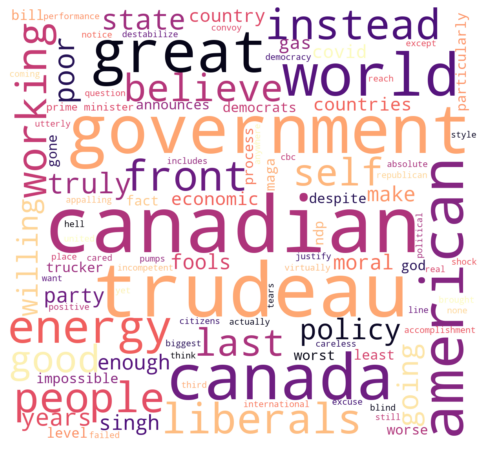

In [165]:
mask = np.array(Image.open("C:/Users/reigh/Desktop/Stupid pics/con1.png"))

wordcloud = WordCloud(width=5000, 
                     height=3000, 
                     random_state=10, 
                     max_font_size=200,
                     mask=mask,
                     background_color='white',
                     max_words=100,
                     colormap='magma').generate(all_nat_lem)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [166]:
sentiment_score(all_nat_lem)

Overall sentiment of dictionary:  {'neg': 0.211, 'neu': 0.596, 'pos': 0.193, 'compound': -0.9865}
Sentiment seems:  21.099999999999998 % Negative
Sentiment seems:  59.599999999999994 % Neutral
Sentiment seems:  19.3 % Positive
Sentiment rating overall Neutral


In [167]:
nat_po['sentiment'] = nat_po['text_string_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)
nat_po.head(2)

0  \
0  i have had the great privilege of travelling t...   
1  first i have not travelled anywhere else where...   

                                          text_token  \
0  [great, privilege, travelling, american, citie...   
1  [first, travelled, anywhere, citizens, governm...   

                                         text_string  \
0  great privilege travelling american cities sta...   
1  first travelled anywhere citizens government n...   

                                   text_string_fdist  \
0  great privilege travelling american cities sta...   
1  first travelled anywhere citizens government n...   

                                     text_string_lem  sentiment  
0  great privilege travelling american cities sta...   0.357143  
1  first travelled anywhere citizens government n...   0.250000

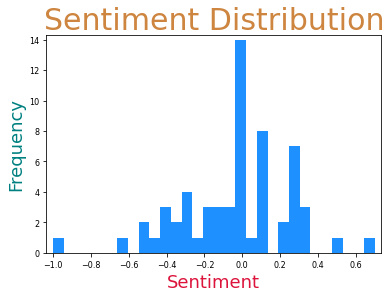

In [168]:
plt.figure(figsize=(6,4))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=18, color='crimson')
plt.xticks(fontsize=8)
plt.ylabel('Frequency', fontsize=18, color='teal')
plt.yticks(fontsize=8)
plt.hist(nat_po['sentiment'], bins=30, color='dodgerblue')
plt.title('Sentiment Distribution', fontsize=30, color='peru')
plt.show()

In [169]:
nat_po.to_csv("nat_po.csv", na_rep='NULL')

______________________________________________________________________________________________________
## brief outro  TBD !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
______________________________________________________________________________________________________

   ##                                                                                               On to part two!